# LOW LIGHT IMAGE ENHANCEMENT
## Using Histogram Equalization-Based Processing

Importing Necessary Libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import exposure

Reading and Preprocessing the Image

In [2]:
def read_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Error: Image not found at {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Applying CLAHE (Contrast Limited Adaptive Histogram Equalisation)

In [3]:
def apply_clahe(image, clip_limit= 3.0, tile_grid_size=(8, 8)):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)
    return img_output

Plotting Histograms of RGB (To compare original and enhanced image properties)

In [4]:
def plot_histograms(original, enhanced):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i, col in enumerate(['r', 'g', 'b']):
        axs[0, i].hist(original[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
        axs[0, i].set_title(f'Original {col.upper()} Histogram')
        axs[1, i].hist(enhanced[:, :, i].ravel(), bins=256, color=col, alpha=0.5)
        axs[1, i].set_title(f'Enhanced {col.upper()} Histogram')

    plt.show()

Displaying the Images

In [5]:
def display_images(original, enhanced):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Enhanced Image')
    plt.imshow(enhanced)
    plt.axis('off')

    plt.show()

Enhancing the image using clahe and plotting the histograms

In [6]:
def enhance_image(image_path):
    original_image = read_image(image_path)
    enhanced_image = apply_clahe(original_image)
    display_images(original_image, enhanced_image)
    plot_histograms(original_image, enhanced_image)

Testing on images

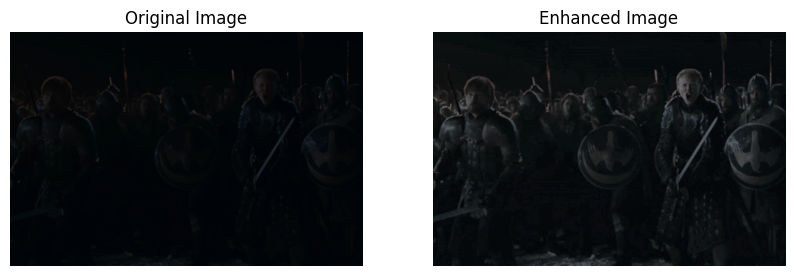

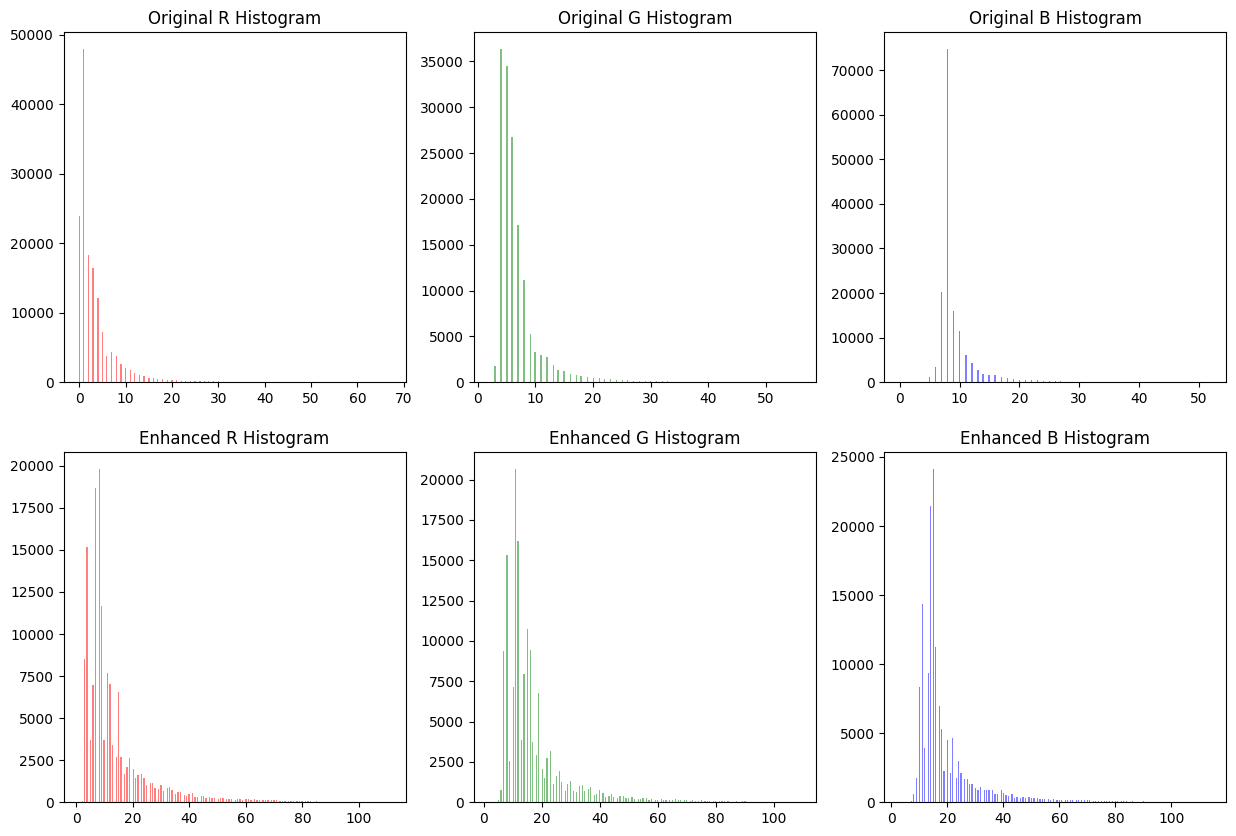

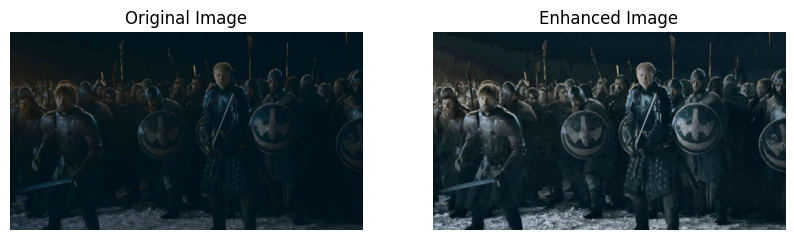

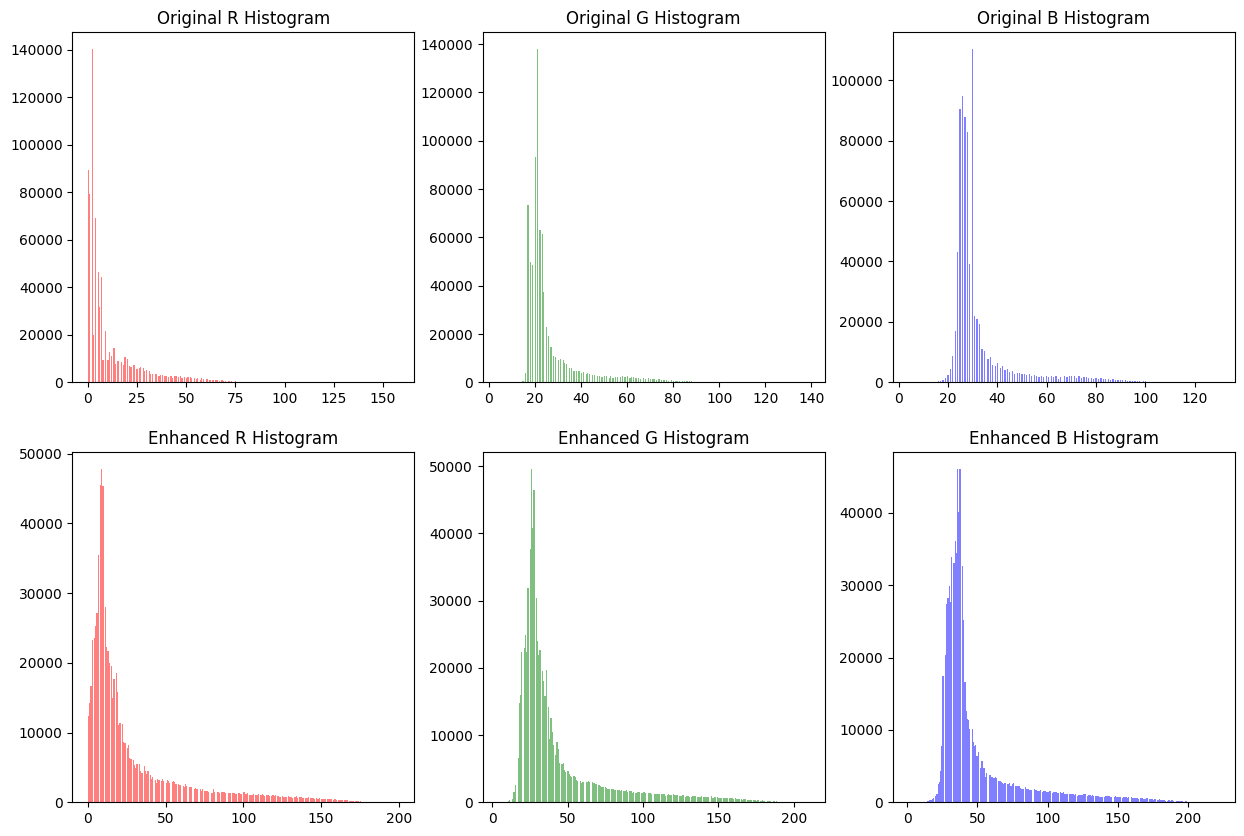

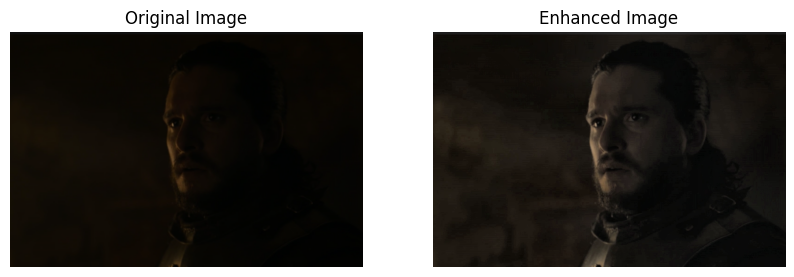

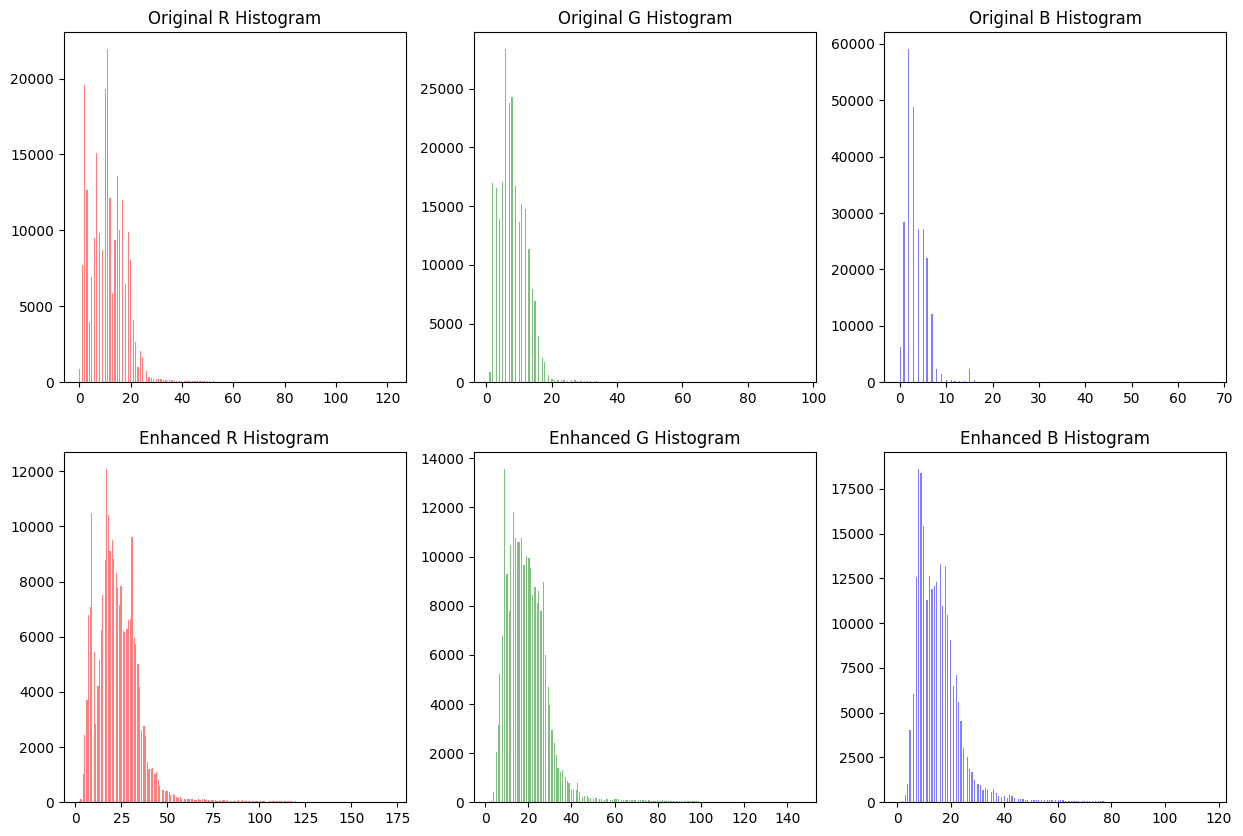

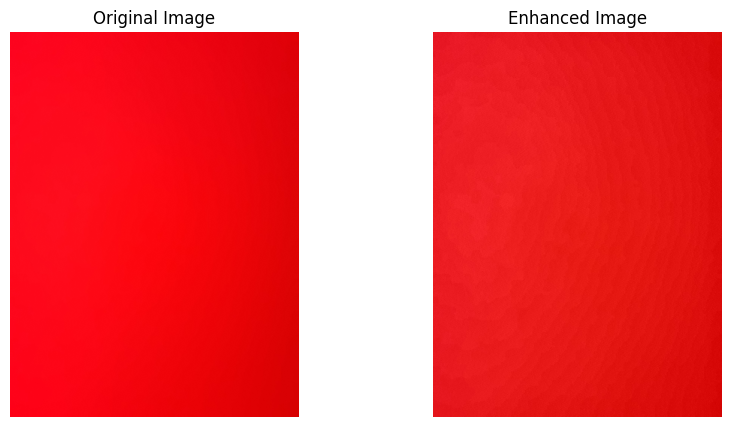

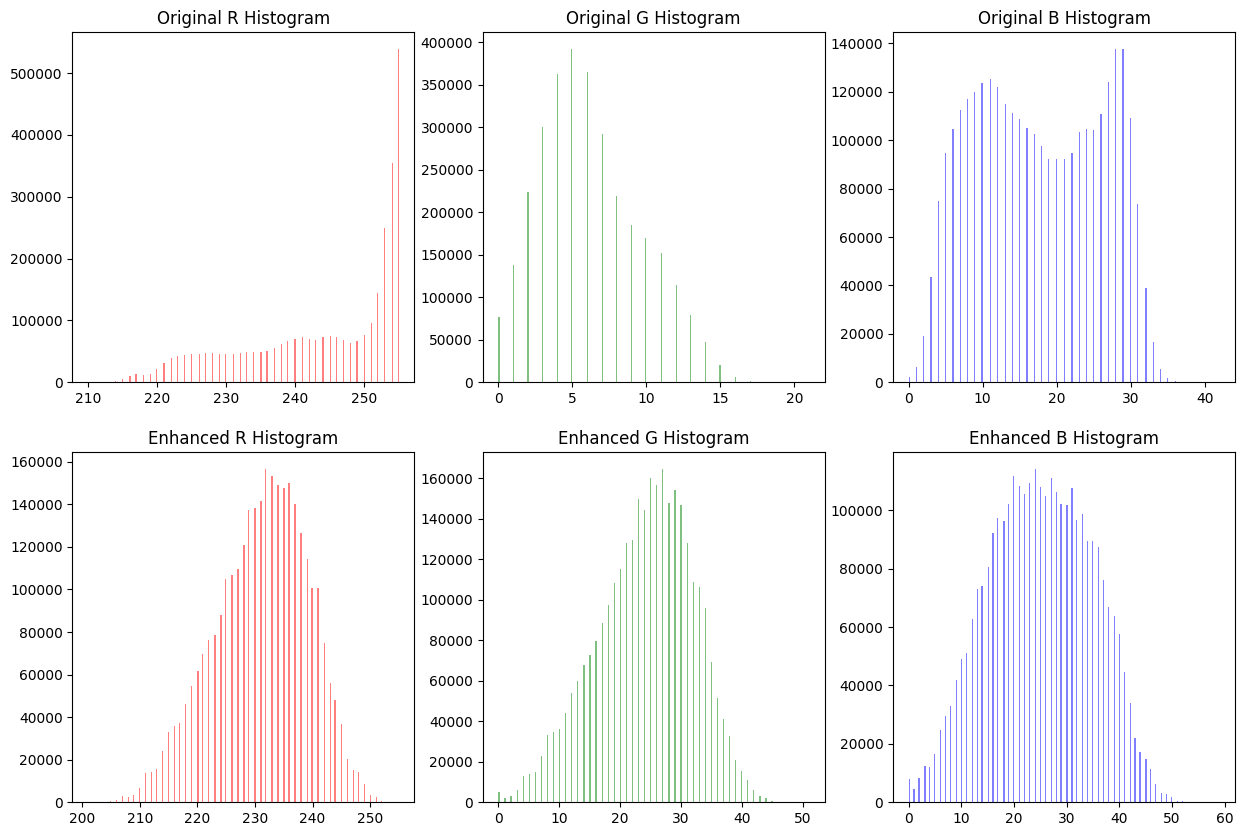

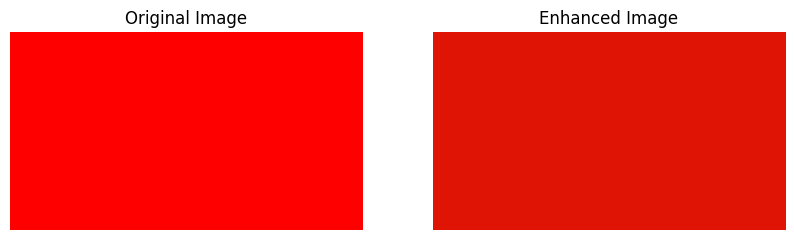

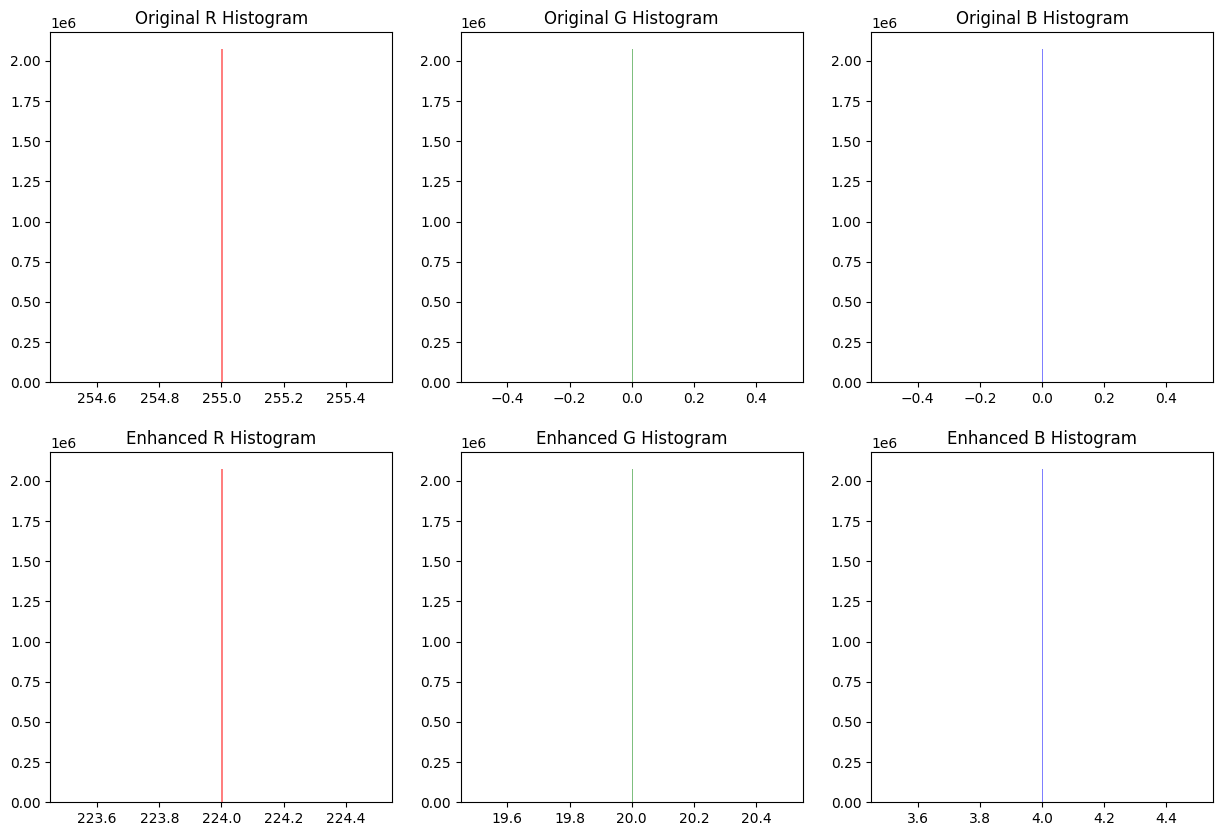

In [7]:
image_paths = ['./got1.png', './got2.png', './got3.png', './got4.png', './got5.png']

for image_path in image_paths:
    try:
        enhance_image(image_path)
    except ValueError as e:
        print(e)
